In [267]:
import pandas as pd
import numpy as np

In [268]:
import matplotlib.pyplot as plt
import seaborn as sns

## Base_saidas: 

In [269]:
df = pd.read_csv('base_saidas_202407142342.csv', low_memory=False)

In [270]:
df.replace('', np.nan, inplace=True)
df.replace(' ', np.nan, inplace=True)

C:\Users\gabri\AppData\Local\Temp\ipykernel_27776\3778862885.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(' ', np.nan, inplace=True)


In [271]:
print(df.columns)

Index(['id_dt_ini', 'id_dt_fin', 'id_cnpj', 'id_sped', 'reg', 'num_doc',
       'chv_nfe', 'cod_part', 'cnpj_destinatario', 'cpf_destinatario',
       'nome_destinatario', 'cod_mum_destinatario', 'nome_mun_destinatario',
       'uf_destinatario', 'cod_pais_destinatario', 'pais_destinatario',
       'num_item', 'cod_item', 'cod_ean', 'descr_compl', 'ncm', 'cest',
       'extipi', 'cfop', 'tipo', 'origem', 'unid', 'qtd', 'vl_unit', 'vl_item',
       'eantrib', 'unid_trib', 'qtd_trib', 'v_frete', 'v_seg', 'vl_desc',
       'outras_despesas', 'cst_icms', 'vl_bc_icms', 'aliq_icms', 'vl_icms',
       'vdeson', 'mot_des_icms', 'modbc_icms_st', 'pmvast_icms',
       'predbcst_imcs', 'aliq_st_icms', 'vl_icms_st', 'pred_bc', 'vbcstret',
       'vstret', 'pfcpst', 'vfcp', 'vfcpst', 'vbcfcpst', 'vbc', 'vdespadu',
       'vii', 'viof', 'vbcufddest', 'pfcpufddest', 'picmsinter',
       'picmsinterpart', 'vfcpufdest', 'vicmsufdest', 'vicmsufremet',
       'imposto_ipi_cst', 'imposto_ipi_vbc', 'impost

#### Analise de NaN:

In [272]:
nan_percentage_dict = {}

In [273]:
for column in df.columns:
    nan_percentage = df[column].isna().mean() * 100
    nan_percentage_dict[column] = nan_percentage
    print(f"{column}: {nan_percentage}%")

id_dt_ini: 0.0%
id_dt_fin: 0.0%
id_cnpj: 0.0%
id_sped: 0.0%
reg: 0.0%
num_doc: 0.0%
chv_nfe: 0.0%
cod_part: 91.23299262921148%
cnpj_destinatario: 22.34896564010065%
cpf_destinatario: 88.15997505956756%
nome_destinatario: 1.6701182443717015%
cod_mum_destinatario: 1.9607188188923776%
nome_mun_destinatario: 10.727726189680896%
uf_destinatario: 1.9640590553811208%
cod_pais_destinatario: 10.94428485536776%
pais_destinatario: 5.265882824503975%
num_item: 8.767007370788518%
cod_item: 0.0%
cod_ean: 8.983566036475382%
descr_compl: 0.0%
ncm: 8.767007370788518%
cest: 17.7505734072639%
extipi: 98.87990736410805%
cfop: 0.0%
tipo: 0.0%
origem: 0.0%
unid: 8.767007370788518%
qtd: 8.767007370788518%
vl_unit: 8.767007370788518%
vl_item: 0.0%
eantrib: 17.7505734072639%
unid_trib: 17.7505734072639%
qtd_trib: 17.7505734072639%
v_frete: 85.19551517580778%
v_seg: 85.19551517580778%
vl_desc: 85.19551517580778%
outras_despesas: 17.7505734072639%
cst_icms: 8.983566036475382%
vl_bc_icms: 2.4751152381588617%
aliq

In [274]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

timestamp_columns = df[['dt_created','dt_updated','id_dt_ini', 'id_dt_fin', 'dt_doc']]

string_columns = df.select_dtypes(include=['object']).columns
string_columns = [col for col in string_columns if col not in list(numeric_columns) + list(timestamp_columns)]

In [275]:
df[string_columns].describe()

,id_sped,reg,chv_nfe,cod_part,cpf_destinatario,nome_destinatario,nome_mun_destinatario,uf_destinatario,pais_destinatario,num_item,...,vfcpufdest,vicmsufdest,vicmsufremet,id_importation,id_tenant,classificacao_gerencial,sub_classificacao_gerencial,ncm_abrev,cod_ncm_desc,cod_cst_desc
count,179628,179628,179628,15748,21268,176628,160358,176100,170169,163880,...,24859,25946,25946,179628,179628,179628,179628,163880,161973,163491
unique,162,4,84556,11234,14381,37558,1312,28,3,265,...,2047,10351,1,1,1,17,19,18,28,6
top,abfs://land@paulatorrestaxboardlake.dfs.core.w...,55,35230709017661000609550960000006491227769838,8317,26506768843,TORRES COMERCIO DE CALCADOS - EIRELI,SAO PAULO,SP,BRASIL,1,...,0.00,0.00,0.00,6601c26ae4d1f54a569c6d53,paulatorres,Calçado De Borracha,"Calçado com sola exterior de borracha, plástic...",6403,64039990 - Calçado De Borracha,Tributada integralmente
freq,12875,138284,265,241,34,61767,81417,116424,169312,68808,...,19998,92,25946,179628,179628,155958,152269,152269,76043,158651


In [276]:
print("Numeric Columns:")
for column in numeric_columns:
    nan_percentage = df[column].isna().mean() * 100
    print(f"{column}: {nan_percentage:.2f}%")

Numeric Columns:
id_cnpj: 0.00%
num_doc: 0.00%
cnpj_destinatario: 22.35%
cod_mum_destinatario: 1.96%
cod_pais_destinatario: 10.94%
cfop: 0.00%
vl_item: 0.00%
cst_icms: 8.98%
vl_bc_icms: 2.48%
vl_icms: 2.42%
pmvast_icms: 100.00%
predbcst_imcs: 100.00%
aliq_st_icms: 100.00%
vl_icms_st: 91.23%
pred_bc: 100.00%
vstret: 100.00%
pfcpst: 100.00%
vfcpst: 100.00%
vbcfcpst: 100.00%
vdespadu: 100.00%
viof: 100.00%
imposto_ipi_cst: 98.88%
imposto_ipi_vbc: 98.88%
imposto_ipi_pipi: 98.88%
imposto_ipi_vipi: 98.88%
imposto_pis_cst: 29.48%
imposto_pis_vbc: 29.48%
imposto_pis_ppis: 29.48%
imposto_pis_vpis: 29.48%
imposto_cofins_cst: 29.48%
imposto_cofins_vbc: 29.48%
imposto_cofins_pcofins: 29.48%
imposto_cofins_vcofins: 29.48%
year: 0.00%
month: 0.00%
day: 0.00%
hour: 0.00%
minute: 0.00%
cfop_cst: 0.00%
rown: 0.00%


In [277]:
print("\nTimestamp Columns:")
for column in timestamp_columns:
    nan_percentage = df[column].isna().mean() * 100
    print(f"{column}: {nan_percentage:.2f}%")


Timestamp Columns:
dt_created: 0.00%
dt_updated: 0.00%
id_dt_ini: 0.00%
id_dt_fin: 0.00%
dt_doc: 8.98%


In [278]:
print("\nString Columns:")
for column in string_columns:
    nan_percentage = df[column].isna().mean() * 100
    print(f"{column}: {nan_percentage:.2f}%")


String Columns:
id_sped: 0.00%
reg: 0.00%
chv_nfe: 0.00%
cod_part: 91.23%
cpf_destinatario: 88.16%
nome_destinatario: 1.67%
nome_mun_destinatario: 10.73%
uf_destinatario: 1.96%
pais_destinatario: 5.27%
num_item: 8.77%
cod_item: 0.00%
cod_ean: 8.98%
descr_compl: 0.00%
ncm: 8.77%
cest: 17.75%
extipi: 98.88%
tipo: 0.00%
origem: 0.00%
unid: 8.77%
qtd: 8.77%
vl_unit: 8.77%
eantrib: 17.75%
unid_trib: 17.75%
qtd_trib: 17.75%
v_frete: 85.20%
v_seg: 85.20%
vl_desc: 85.20%
outras_despesas: 17.75%
aliq_icms: 2.48%
vdeson: 68.20%
mot_des_icms: 100.00%
modbc_icms_st: 20.23%
vbcstret: 17.75%
vfcp: 100.00%
vbc: 9.24%
vii: 17.75%
vbcufddest: 85.56%
pfcpufddest: 86.16%
picmsinter: 85.56%
picmsinterpart: 85.56%
vfcpufdest: 86.16%
vicmsufdest: 85.56%
vicmsufremet: 85.56%
id_importation: 0.00%
id_tenant: 0.00%
classificacao_gerencial: 0.00%
sub_classificacao_gerencial: 0.00%
ncm_abrev: 8.77%
cod_ncm_desc: 9.83%
cod_cst_desc: 8.98%


#### 0% NaN:

In [279]:
zero_percent_nan = {key: value for key, value in nan_percentage_dict.items() if value == 0}

print("Colunas completas:")

for key in zero_percent_nan:
    print(f"{key}")

Colunas completas:
id_dt_ini
id_dt_fin
id_cnpj
id_sped
reg
num_doc
chv_nfe
cod_item
descr_compl
cfop
tipo
origem
vl_item
id_importation
id_tenant
dt_created
dt_updated
year
month
day
hour
minute
classificacao_gerencial
sub_classificacao_gerencial
cfop_cst
rown


#### 0-20% NaN:

In [280]:
twenty_percent_nan = {key: value for key, value in nan_percentage_dict.items() if value > 0 and value < 20}

for key, value in twenty_percent_nan.items():
    print(f"{key}: {value:.2f}%")

nome_destinatario: 1.67%
cod_mum_destinatario: 1.96%
nome_mun_destinatario: 10.73%
uf_destinatario: 1.96%
cod_pais_destinatario: 10.94%
pais_destinatario: 5.27%
num_item: 8.77%
cod_ean: 8.98%
ncm: 8.77%
cest: 17.75%
unid: 8.77%
qtd: 8.77%
vl_unit: 8.77%
eantrib: 17.75%
unid_trib: 17.75%
qtd_trib: 17.75%
outras_despesas: 17.75%
cst_icms: 8.98%
vl_bc_icms: 2.48%
aliq_icms: 2.48%
vl_icms: 2.42%
vbcstret: 17.75%
vbc: 9.24%
vii: 17.75%
ncm_abrev: 8.77%
cod_ncm_desc: 9.83%
cod_cst_desc: 8.98%
dt_doc: 8.98%


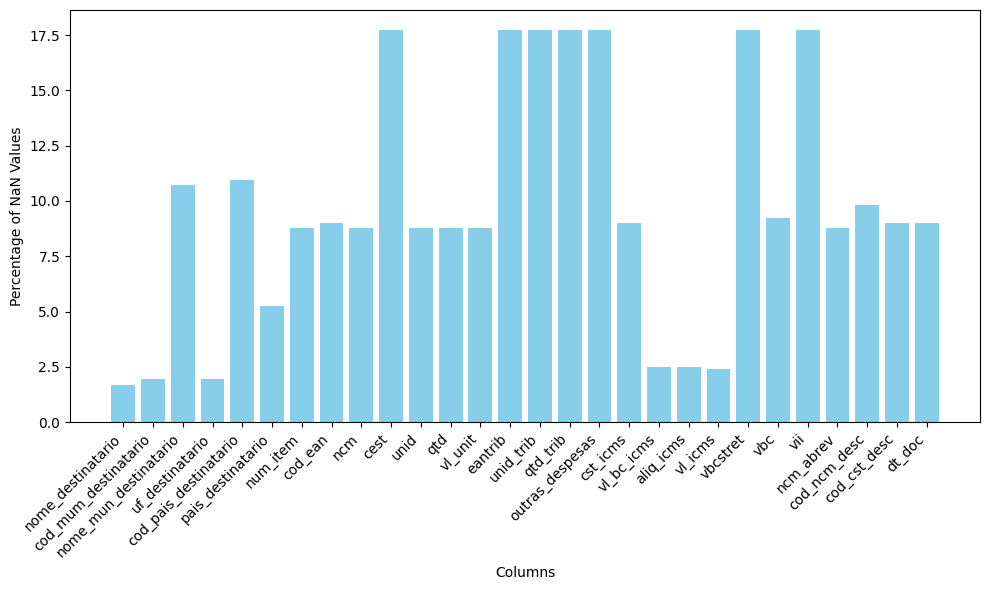

In [281]:
filtered_nan_percentage_dict = {k: v for k, v in nan_percentage_dict.items() if v > 0 and v < 20}

columns = list(filtered_nan_percentage_dict.keys())
nan_percentages = list(filtered_nan_percentage_dict.values())

plt.figure(figsize=(10, 6))
plt.bar(columns, nan_percentages, color='skyblue')

plt.xlabel('Columns')
plt.ylabel('Percentage of NaN Values')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### 20-50% NaN:

In [282]:
fifty_percent_nan = {key: value for key, value in nan_percentage_dict.items() if value > 20 and value < 50}

for key, value in fifty_percent_nan.items():
    print(f"{key}: {value:.2f}%")

cnpj_destinatario: 22.35%
modbc_icms_st: 20.23%
imposto_pis_cst: 29.48%
imposto_pis_vbc: 29.48%
imposto_pis_ppis: 29.48%
imposto_pis_vpis: 29.48%
imposto_cofins_cst: 29.48%
imposto_cofins_vbc: 29.48%
imposto_cofins_pcofins: 29.48%
imposto_cofins_vcofins: 29.48%


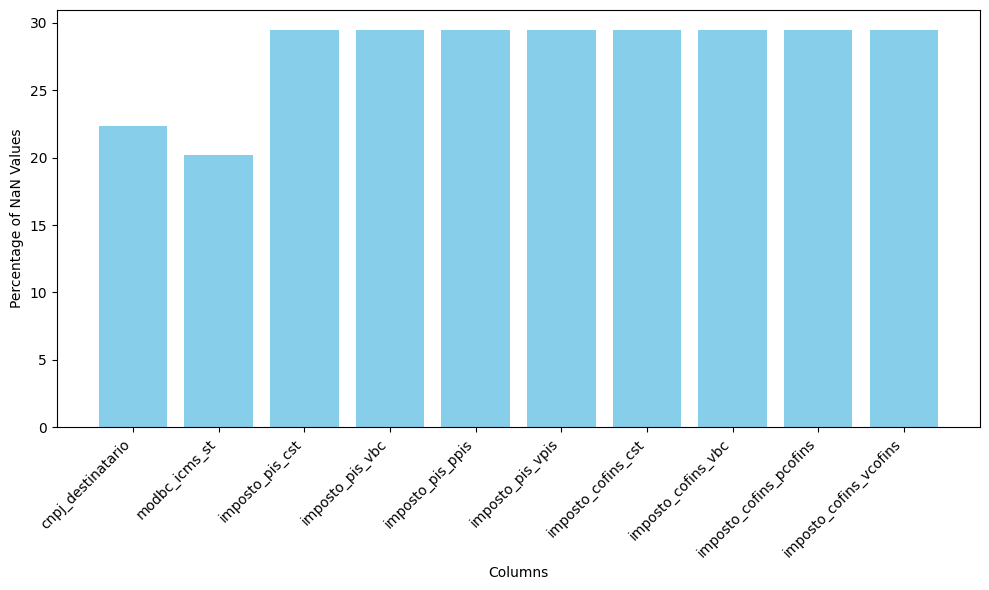

In [283]:
filtered_nan_percentage_dict = {k: v for k, v in nan_percentage_dict.items() if v > 20 and v < 50}

columns = list(filtered_nan_percentage_dict.keys())
nan_percentages = list(filtered_nan_percentage_dict.values())

plt.figure(figsize=(10, 6))
plt.bar(columns, nan_percentages, color='skyblue')

plt.xlabel('Columns')
plt.ylabel('Percentage of NaN Values')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### 50-100% NaN:

In [284]:
majority_percent_nan = {key: value for key, value in nan_percentage_dict.items() if value > 50 and value < 100}

for key, value in majority_percent_nan.items():
    print(f"{key}: {value:.2f}%")

cod_part: 91.23%
cpf_destinatario: 88.16%
extipi: 98.88%
v_frete: 85.20%
v_seg: 85.20%
vl_desc: 85.20%
vdeson: 68.20%
mot_des_icms: 100.00%
vl_icms_st: 91.23%
vfcp: 100.00%
vbcufddest: 85.56%
pfcpufddest: 86.16%
picmsinter: 85.56%
picmsinterpart: 85.56%
vfcpufdest: 86.16%
vicmsufdest: 85.56%
vicmsufremet: 85.56%
imposto_ipi_cst: 98.88%
imposto_ipi_vbc: 98.88%
imposto_ipi_pipi: 98.88%
imposto_ipi_vipi: 98.88%


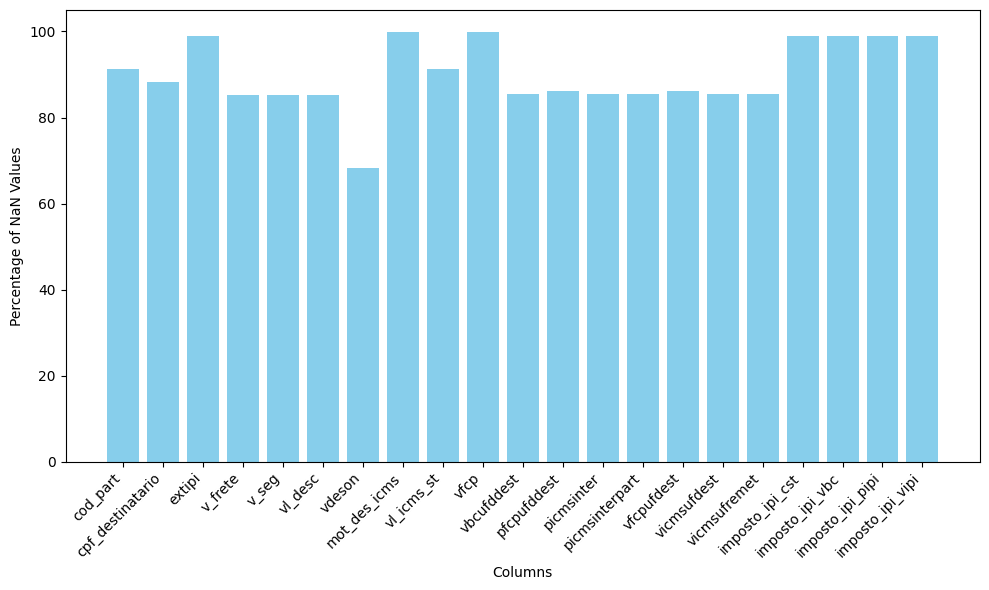

In [285]:
filtered_nan_percentage_dict = {k: v for k, v in nan_percentage_dict.items() if v > 50 and v < 100}

columns = list(filtered_nan_percentage_dict.keys())
nan_percentages = list(filtered_nan_percentage_dict.values())

plt.figure(figsize=(10, 6))
plt.bar(columns, nan_percentages, color='skyblue')

plt.xlabel('Columns')
plt.ylabel('Percentage of NaN Values')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### 100% NaN:

In [286]:
all_nan = {key: value for key, value in nan_percentage_dict.items() if value == 100}

for key, value in all_nan.items():
    print(f"{key}: {value}%")

pmvast_icms: 100.0%
predbcst_imcs: 100.0%
aliq_st_icms: 100.0%
pred_bc: 100.0%
vstret: 100.0%
pfcpst: 100.0%
vfcpst: 100.0%
vbcfcpst: 100.0%
vdespadu: 100.0%
viof: 100.0%


#### Quantidade de valores unicos:

In [287]:
unique_dict = {}

for column in df.columns:
    num_unique_values = len(df[column].dropna().unique())
    unique_dict[column] = num_unique_values
    print(f'{column}: {num_unique_values} valores unicos')

id_dt_ini: 18 valores unicos
id_dt_fin: 18 valores unicos
id_cnpj: 14 valores unicos
id_sped: 162 valores unicos
reg: 4 valores unicos
num_doc: 58521 valores unicos
chv_nfe: 84556 valores unicos
cod_part: 11234 valores unicos
cnpj_destinatario: 221 valores unicos
cpf_destinatario: 14381 valores unicos
nome_destinatario: 37558 valores unicos
cod_mum_destinatario: 1172 valores unicos
nome_mun_destinatario: 1312 valores unicos
uf_destinatario: 28 valores unicos
cod_pais_destinatario: 3 valores unicos
pais_destinatario: 3 valores unicos
num_item: 265 valores unicos
cod_item: 5235 valores unicos
cod_ean: 58 valores unicos
descr_compl: 6138 valores unicos
ncm: 29 valores unicos
cest: 8 valores unicos
extipi: 2 valores unicos
cfop: 31 valores unicos
tipo: 14 valores unicos
origem: 3 valores unicos
unid: 8 valores unicos
qtd: 107 valores unicos
vl_unit: 2950 valores unicos
vl_item: 12147 valores unicos
eantrib: 57 valores unicos
unid_trib: 8 valores unicos
qtd_trib: 107 valores unicos
v_frete:

#### 1 valor unico:

In [300]:
unique_value_columns = {key: value for key, value in unique_dict.items() if value == 1}

print("1 valor unico:")
for key in unique_value_columns:
    unique_values = df[key].dropna().unique()
    print(f"{key}: {unique_values}")

1 valor unico:
vl_desc: ['0.00']
mot_des_icms: ['9.58']
modbc_icms_st: ['3']
vl_icms_st: [0.]
vbcstret: ['0.00']
vfcp: ['9.58']
vii: ['0.00']
vicmsufremet: ['0.00']
imposto_ipi_cst: [99.]
imposto_ipi_vbc: [0.]
imposto_ipi_pipi: [0.]
imposto_ipi_vipi: [0.]
imposto_pis_cst: [1.]
imposto_cofins_cst: [1.]
id_importation: ['6601c26ae4d1f54a569c6d53']
id_tenant: ['paulatorres']
dt_created: ['2024-03-25 18:48']
dt_updated: ['2024-03-25 18:48']
year: [2024]
month: [3]
day: [25]
hour: [18]
minute: [48]
rown: [1]


#### 2-12 valores unicos:

In [289]:
to_round = ['extipi', 'pfcpufddest', 'picmsinterpart', 'aliq_icms']
df[to_round] = df[to_round].apply(pd.to_numeric, errors='coerce')
for col in to_round:
    df[col] = df[col].round(2)

In [290]:
unique_value_columns2 = {key: value for key, value in unique_dict.items() if value > 1 and value < 13}

for key in unique_value_columns2:
    unique_values = df[key].dropna().unique()
    print(f"{key}: {unique_values}")

reg: ['59' '55' 'C190' '65']
cod_pais_destinatario: [1058. 2496. 4936.]
pais_destinatario: ['BRASIL' 'ESTADOS UNIDOS' 'MEXICO']
cest: ['000' '041' '050' '090' '040' '100' '200' '060']
extipi: [0.]
origem: ['Dentro do estado' 'Interestadual' 'Exportação']
unid: ['PR' 'UN' 'PARES' 'KG' 'PC' 'PRS' 'CX' 'PE']
unid_trib: ['PR' 'PARES' 'UN' 'KG' 'PC' 'PRS' 'CX' 'PE']
cst_icms: [  0.  41.  50.  90.  40. 100. 141. 200.  60.]
vdeson: ['0.00' '37.87' '143.52' '67.32' '92.88' '134.40' '67.20' '135.12'
 '134.64' '67.56' '71.76' '46.44']
pfcpufddest: [0. 2. 1.]
picmsinter: ['7.00' '12.00']
picmsinterpart: [100.]
imposto_pis_ppis: [0.0165 1.65   0.65  ]
imposto_cofins_pcofins: [0.076 7.6   3.   ]
cod_cst_desc: ['Tributada integralmente' 'Não tributada' 'Suspenção' 'Outras' 'Isenta'
 'ICMS cobrado por ST']


#### 14-18 valores

In [291]:
unique_value_columns3 = {key: value for key, value in unique_dict.items() if value > 13 and value < 19}

for key in unique_value_columns3:
    unique_values = df[key].dropna().unique()
    print(f"{key}: {df[key].unique()}")

id_dt_ini: ['01/12/2023' '01/07/2023' '01/02/2023' '01/08/2023' '01/05/2023'
 '01/11/2023' '01/06/2023' '01/09/2023' '01/03/2023' '01/01/2023'
 '01/04/2023' '01/10/2023' '01/09/2022' '01/08/2022' '01/11/2022'
 '01/07/2022' '01/10/2022' '01/12/2022']
id_dt_fin: ['31/12/2023' '31/07/2023' '28/02/2023' '31/08/2023' '31/05/2023'
 '30/11/2023' '30/06/2023' '30/09/2023' '31/03/2023' '31/01/2023'
 '30/04/2023' '31/10/2023' '30/09/2022' '31/08/2022' '30/11/2022'
 '31/07/2022' '31/10/2022' '31/12/2022']
id_cnpj: [ 9017661000285  9017661000102  9017661000366  9017661000790
  9017661001257  9017661001176  9017661000447  9017661000870
  9017661000609 35068230000258  9017661000528  9017661000951
  9017661001095 35068230000339]
tipo: ['Revenda' 'Transferência - revenda' 'Conserto' 'Baixa de estoque'
 'Devolução' 'Demonstração' 'Outras saídas'
 'Bonificação, doação ou brinde' 'Revenda - ZFM' 'Consignação'
 'Simples faturamento' 'Uso e consumo' 'Comodato' 'Devolução - com ST']
aliq_icms: [18.  7. 12. 

#### 19-42 valores

In [292]:
unique_value_columns3 = {key: value for key, value in unique_dict.items() if value > 18 and value < 43}

for key in unique_value_columns3:
    unique_values = df[key].dropna().unique()
    print(f"{key}: {df[key].unique()}")

uf_destinatario: ['SP' 'DF' 'GO' 'MS' 'MG' 'RS' 'SC' 'PR' 'BA' 'RJ' 'TO' 'PB' 'PE' 'ES'
 'MT' nan 'EX' 'AL' 'PI' 'MA' 'AM' 'SE' 'AC' 'CE' 'PA' 'RO' 'RN' 'RR' 'AP']
ncm: ['64035990' '64039990' '64039190' '64035190' '64041900' '64022000'
 '64029990' '42033000' '00000000' '64032000' '64051010' '43031000' nan
 '64042000' '64051090' '48194000' '64052000' '48191000' '46021900'
 '64059000' '63059000' '62069000' '62046900' '83024900' '48192000'
 '70099200' '84807100' '48232099' '84713019' '72166110']
cfop: [5102 6102 5152 6108 6915 5927 6152 7102 6202 5912 6949 5910 6910 6110
 5915 6916 5917 7949 5949 5202 6912 6922 5916 5553 5556 5904 5555 6908
 5413 6913 5909]
sub_classificacao_gerencial: ['Calçado com sola exterior de borracha, plástico, couro natural ou reconstituído e parte superior de couro natural.'
 'Calçado com sola exterior de borracha, plástico, couro natural ou reconstituído e parte superior de matérias têxteis.'
 'Outro calçado com sola exterior e parte superior de borracha ou plá

In [293]:
analysis_df = df[['pfcpufddest', 'aliq_icms', 'unid', 'qtd', 'vl_unit', 'vl_item', 'qtd_trib', 'v_frete', 'v_seg','outras_despesas','vl_bc_icms','aliq_icms','vl_icms','vdeson','vbcufddest','pfcpufddest','picmsinter','vfcpufdest','vicmsufdest','vicmsufremet','imposto_pis_vbc','imposto_pis_ppis','imposto_pis_vpis','imposto_cofins_vbc','imposto_cofins_pcofins','imposto_cofins_vcofins','cfop_cst']]

In [294]:
def analyse(column):
    pd.to_numeric(df[column], errors='coerce')
    df[column] = df[column].clip(lower=df[column].quantile(0.05), upper=df[column].quantile(0.95))

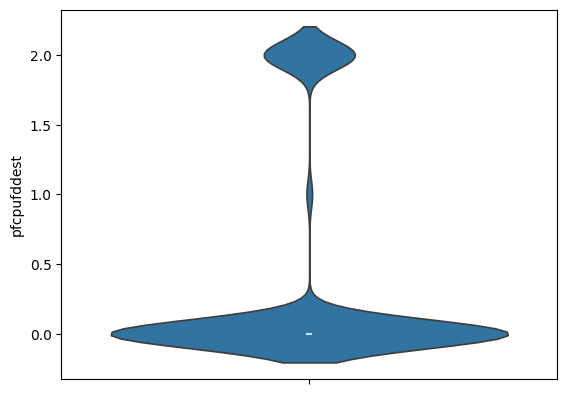

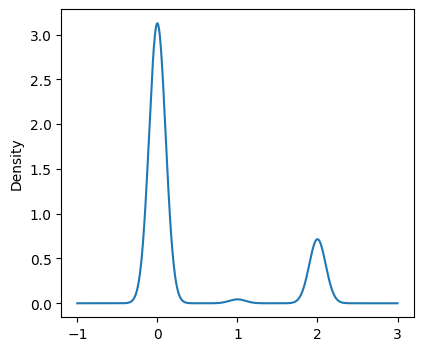

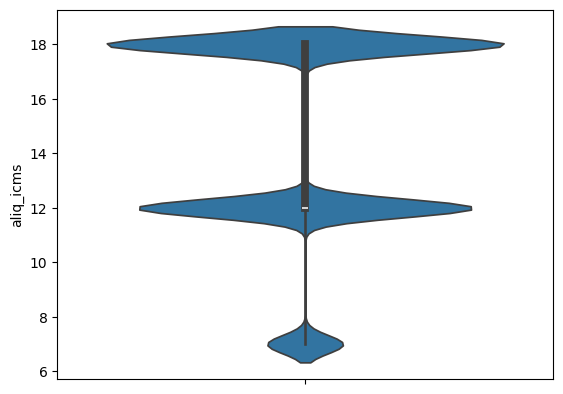

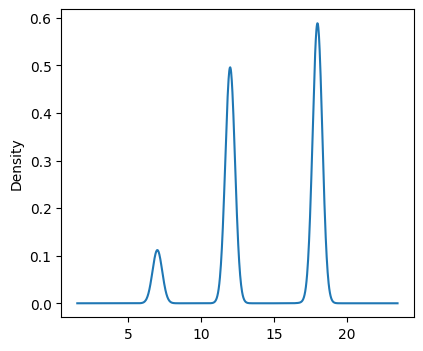

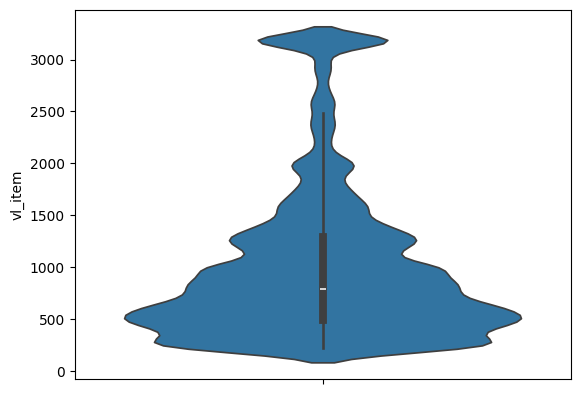

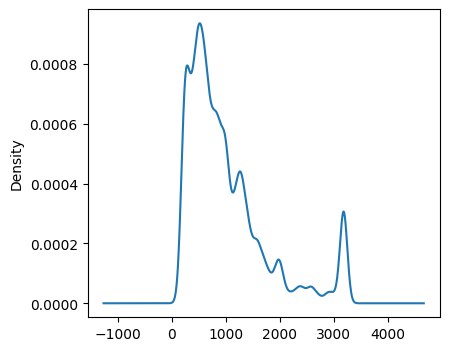

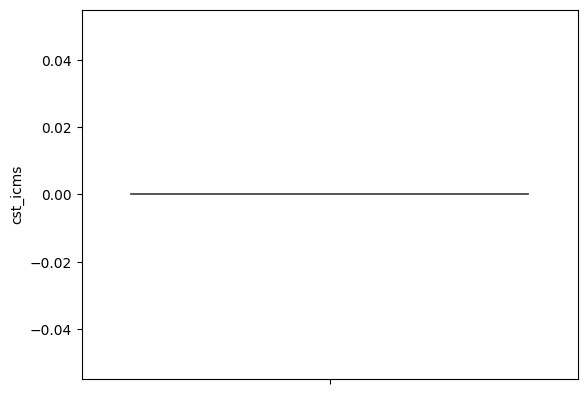

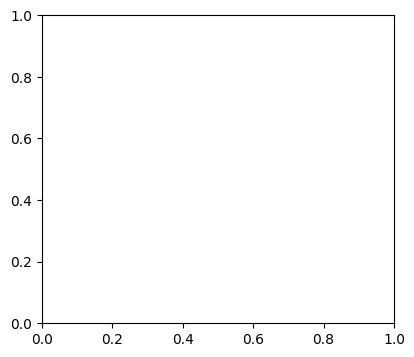

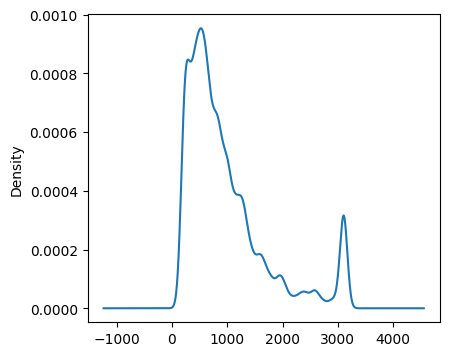

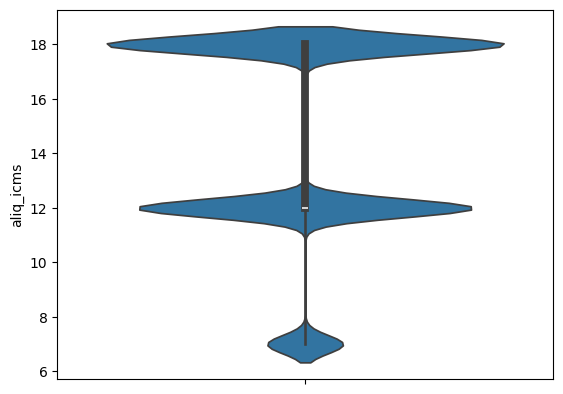

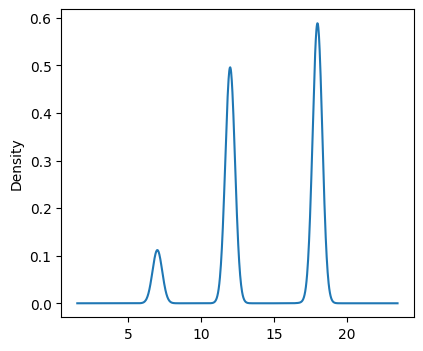

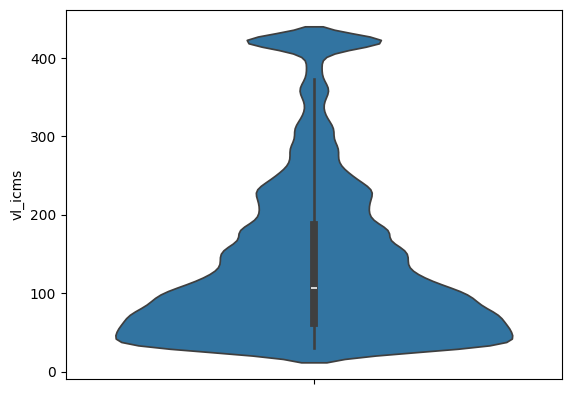

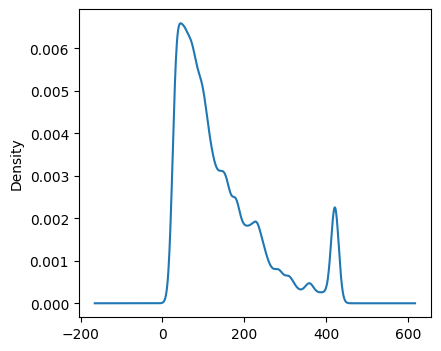

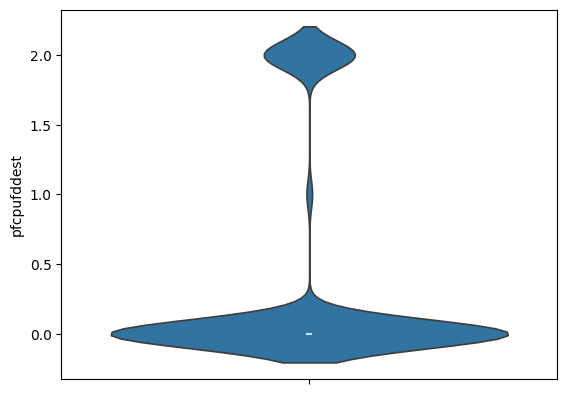

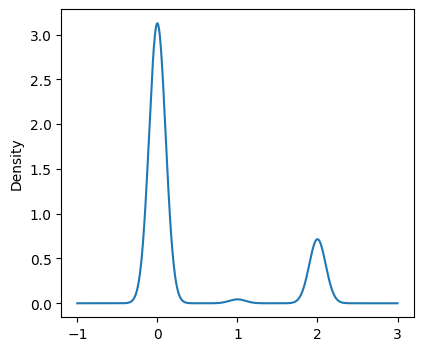

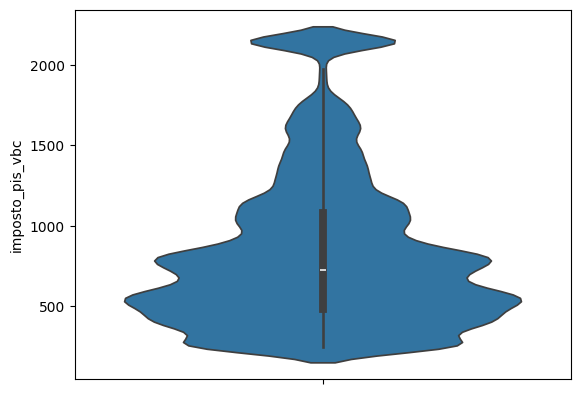

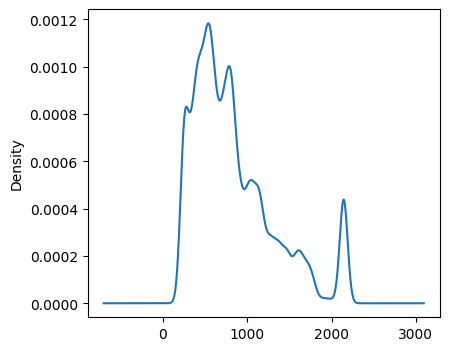

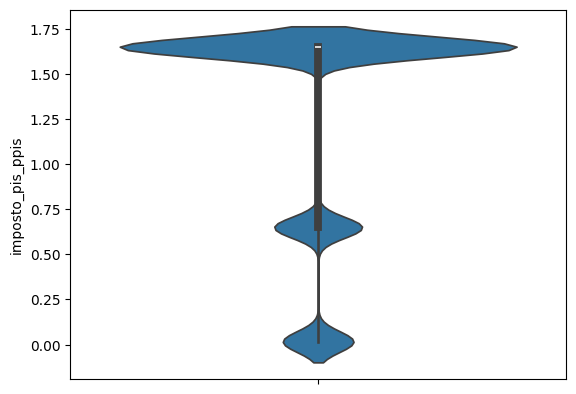

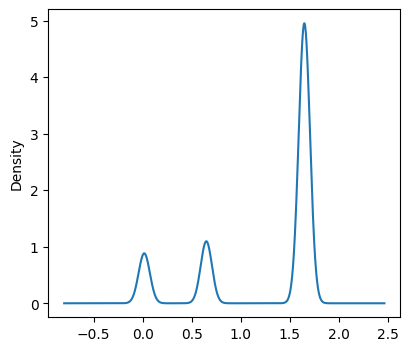

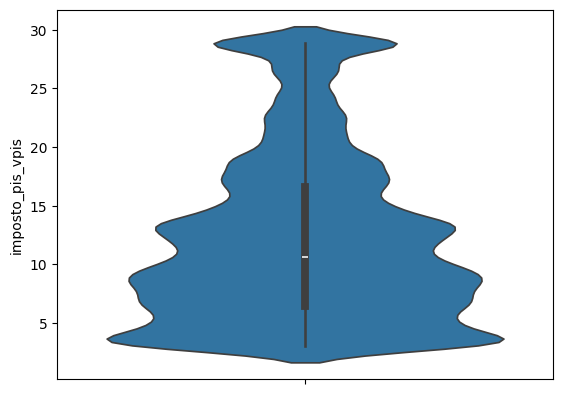

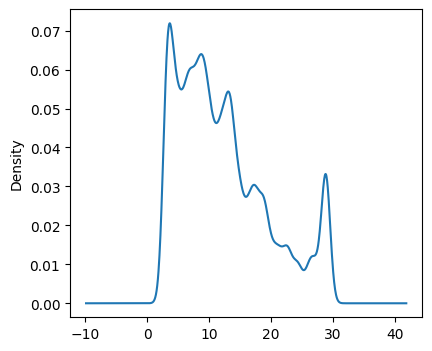

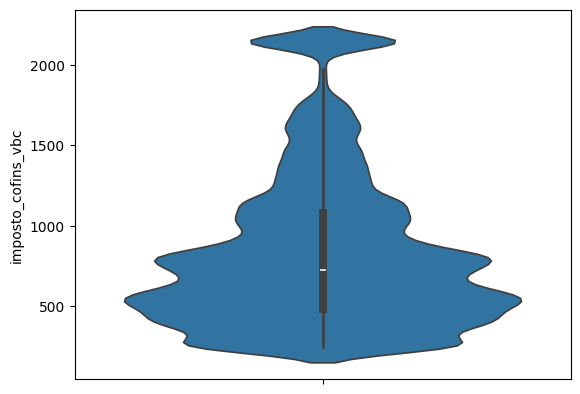

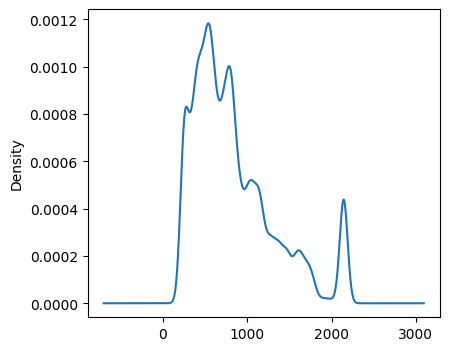

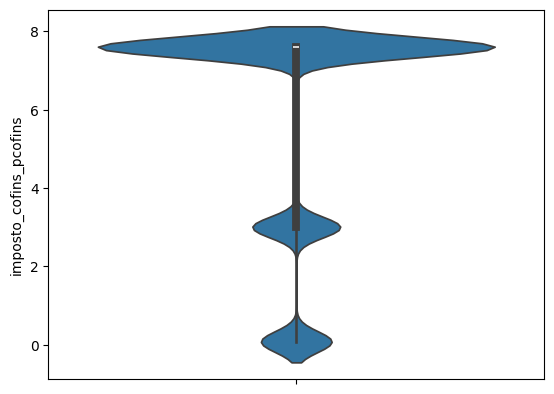

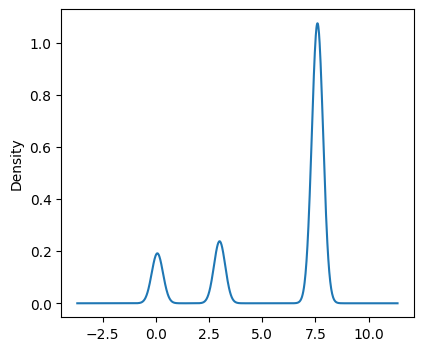

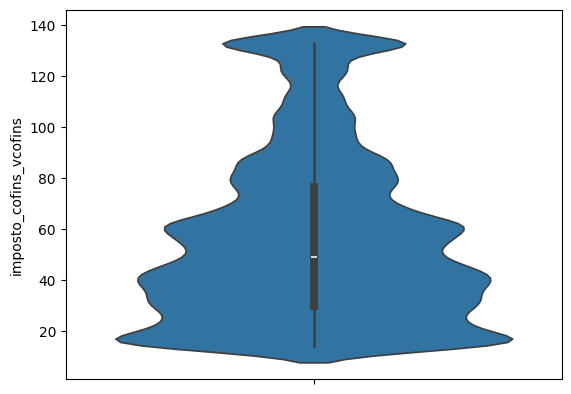

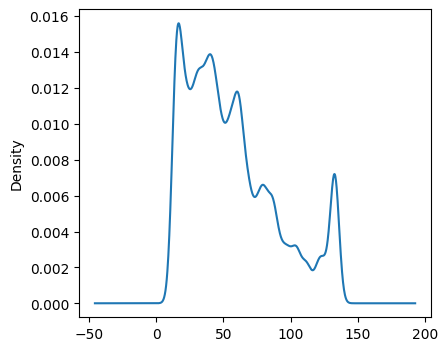

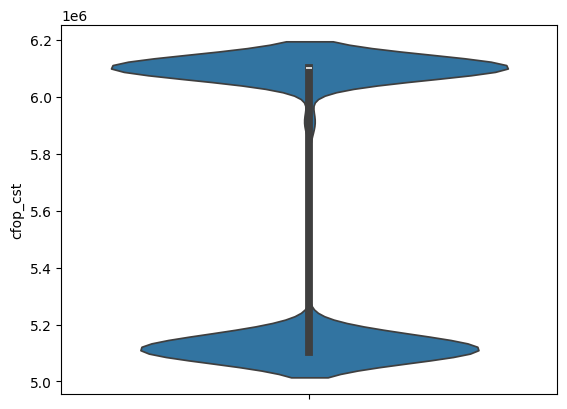

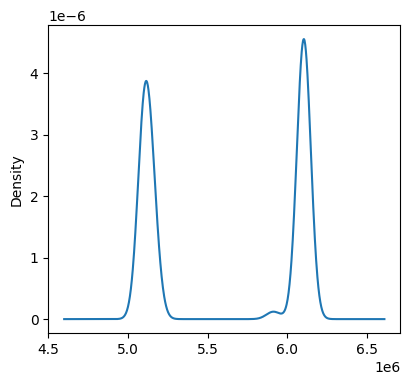

In [298]:
for column in analysis_df:
    if df[column].dtype in ['int64', 'float64']:
        analyse(column)
        sns.violinplot(y=column, data=df)
        plt.show()
        try:
            df[column].plot(
            kind="density", subplots=True, layout=(1, 2), sharex=False, figsize=(10, 4)
            );
            plt.show()
        except: 
            continue